In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_df = pd.read_csv("wine.csv")


print(wine_df.shape)       
print(wine_df.head())     
print(wine_df.info())     
print(wine_df.describe())  
print(wine_df.isnull().sum())  

(178, 14)
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column   

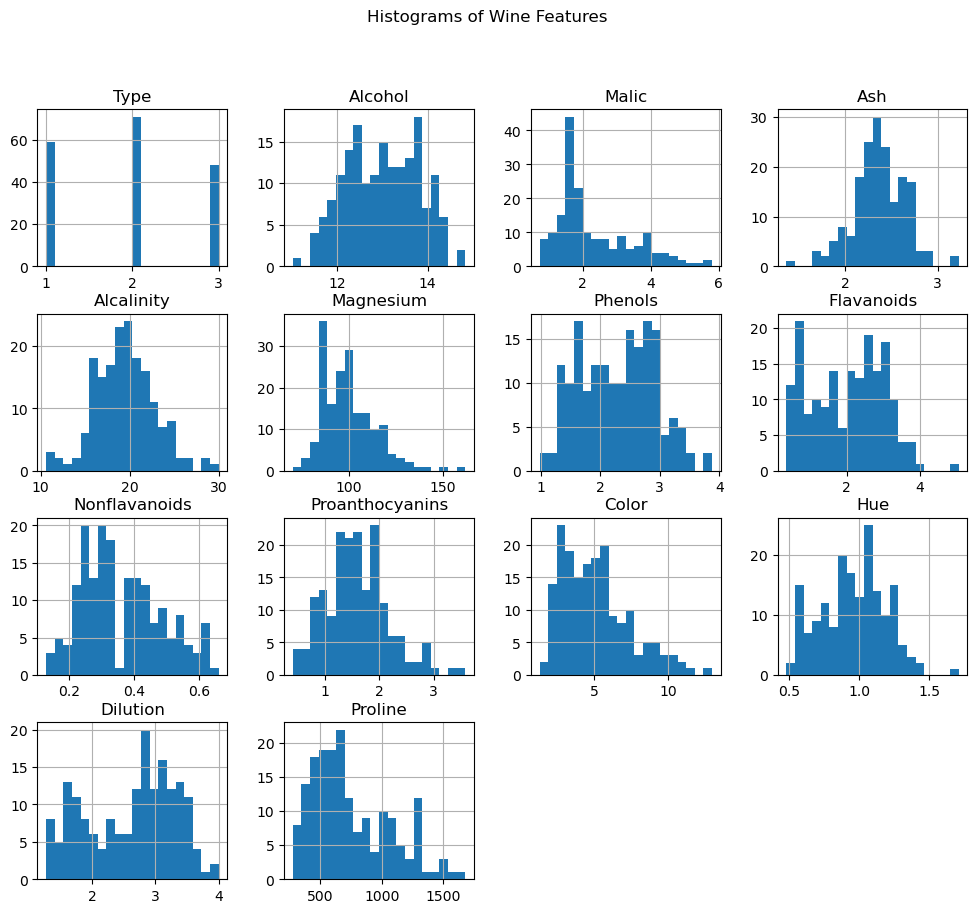

In [3]:
wine_df.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Wine Features")
plt.show()

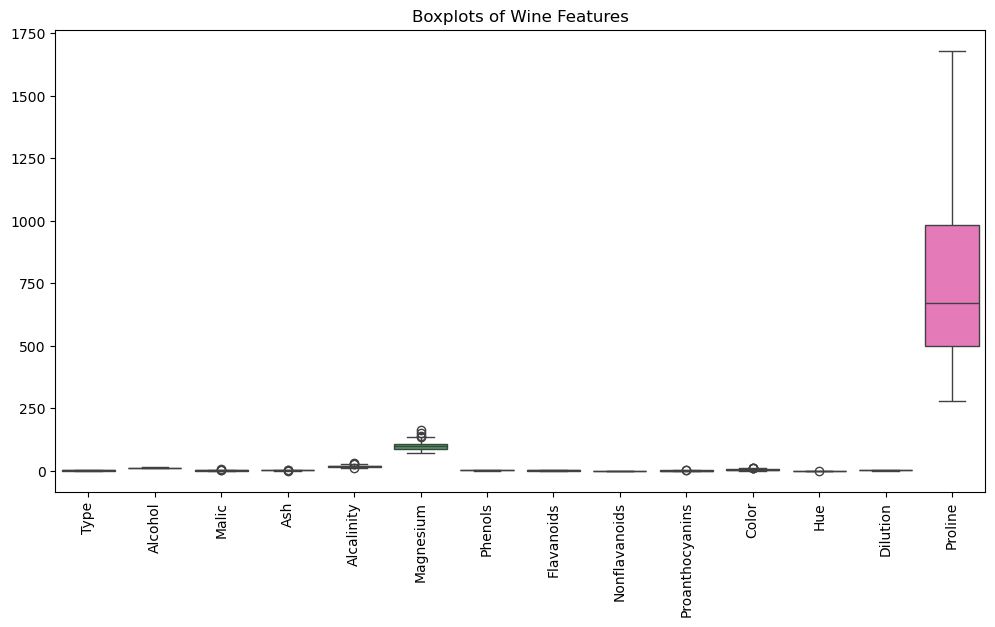

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(data=wine_df)
plt.xticks(rotation=90)
plt.title("Boxplots of Wine Features")
plt.show()

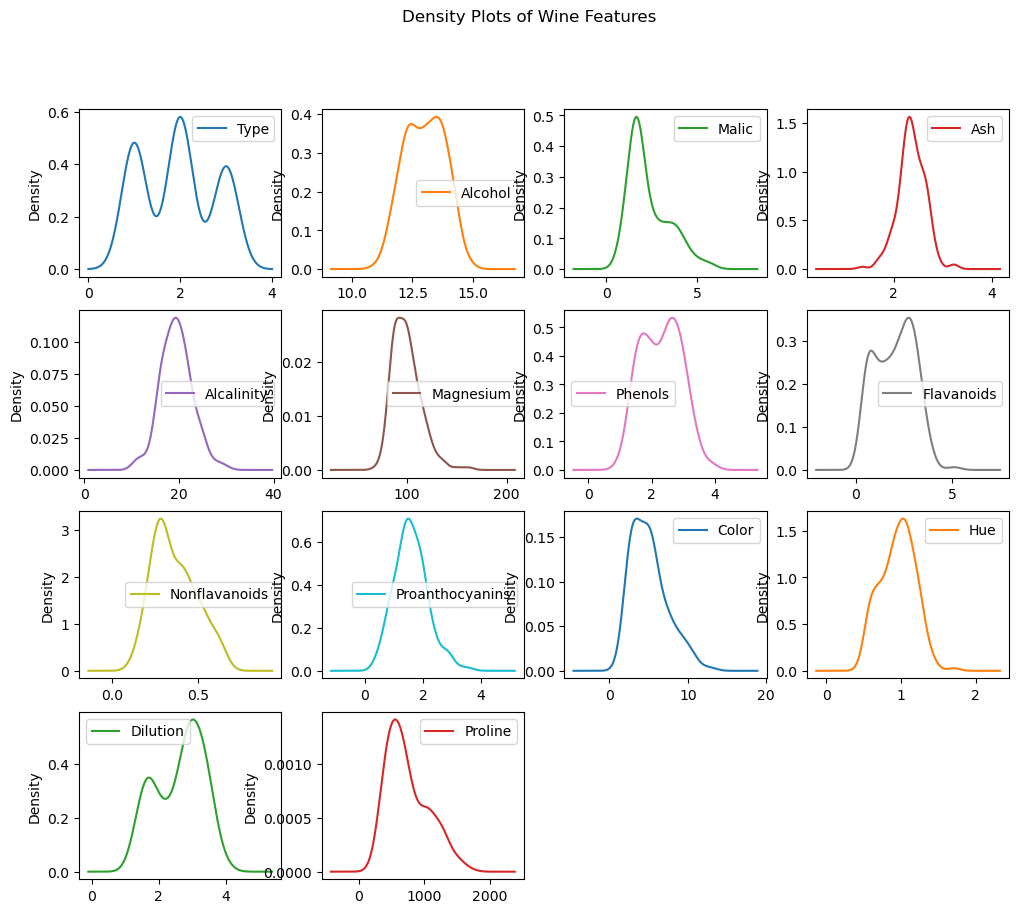

In [5]:
wine_df.plot(kind="density", subplots=True, layout=(4,4), sharex=False, figsize=(12,10))
plt.suptitle("Density Plots of Wine Features")
plt.show()

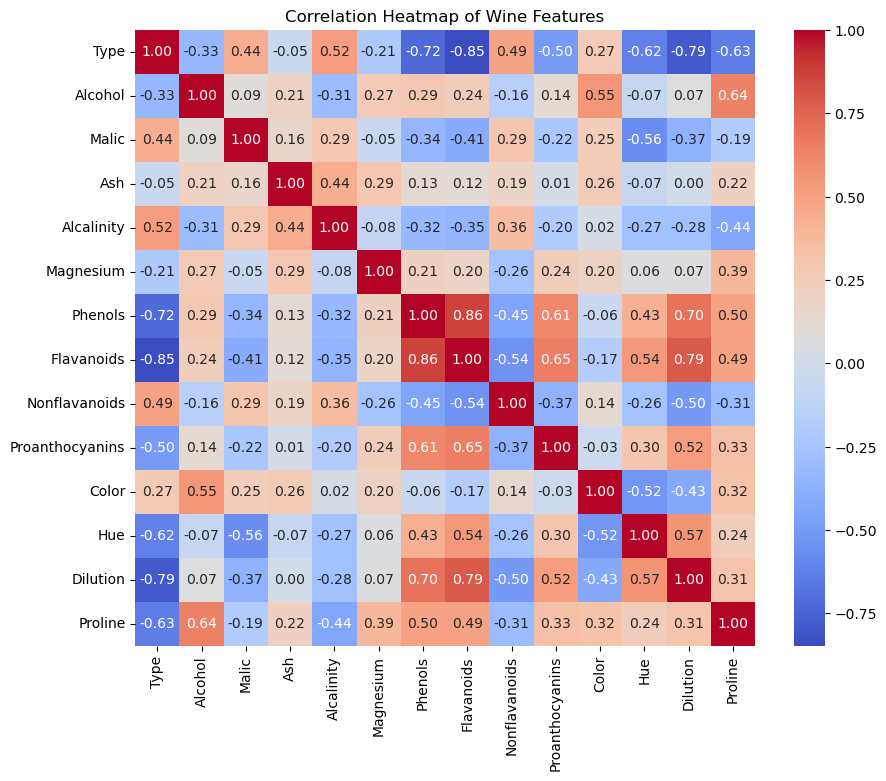

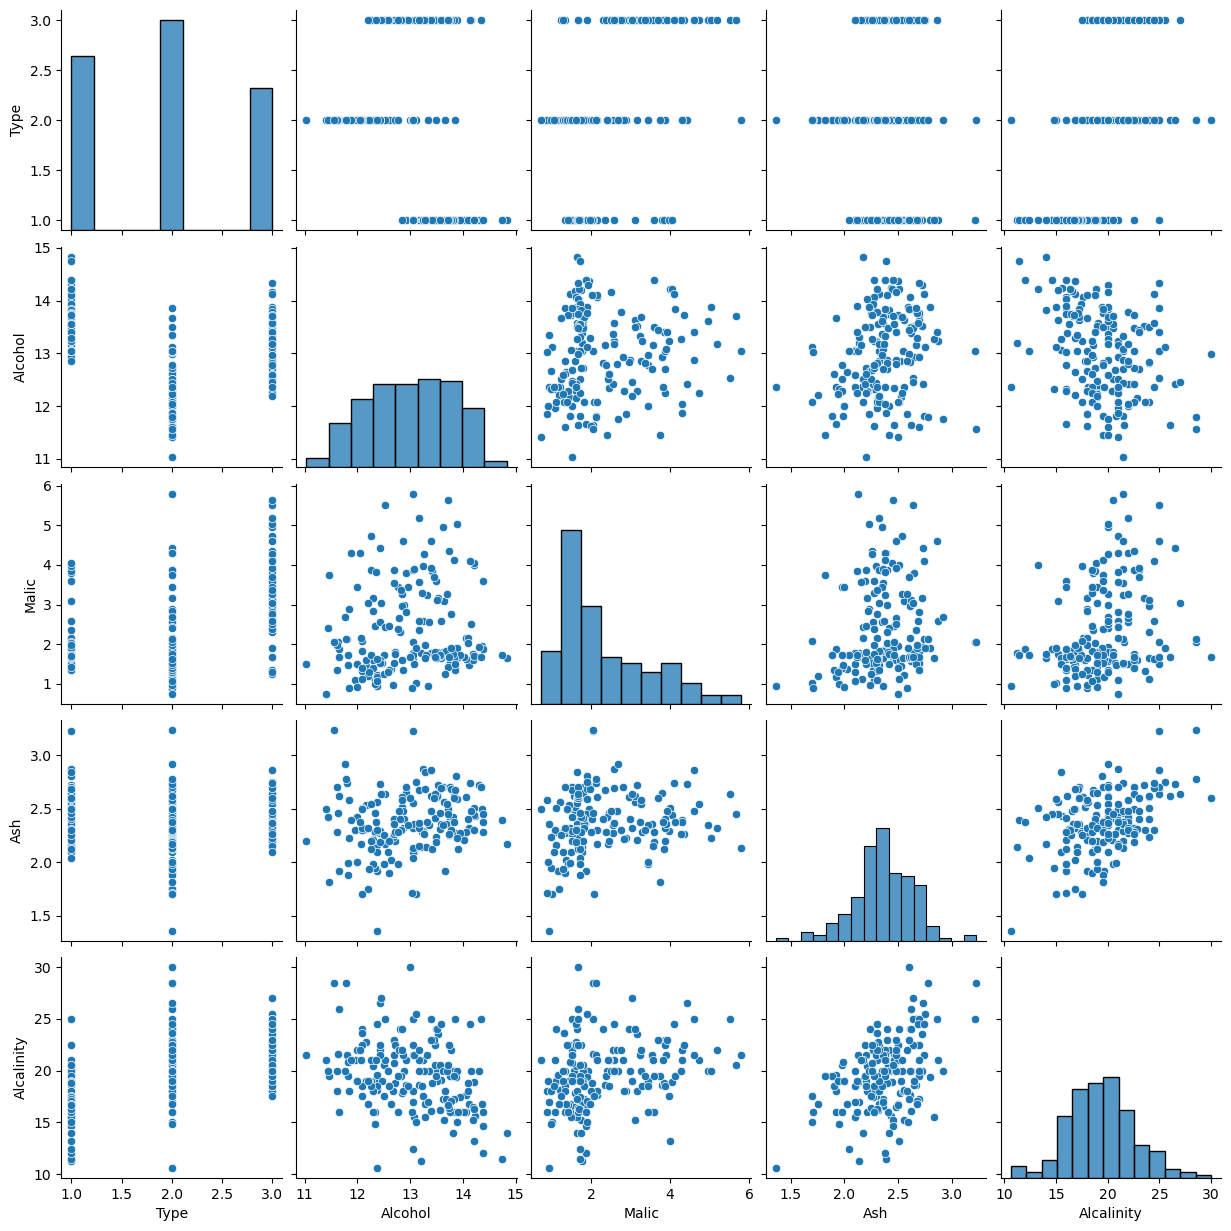

In [6]:
corr = wine_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Wine Features")
plt.show()

# Pairplot (for selected features if many columns)
sns.pairplot(wine_df.iloc[:, :5])  # adjust columns as needed
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("wine.csv")

In [8]:

X = df.drop("Type", axis=1)
y = df["Type"]

In [10]:
# First, define your data and scale it
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a dataset X
# For example:
# X = np.array([[1, 2], [3, 4], [5, 6]])

# Scale the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This creates X_scaled

# Now you can apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot Scree Plot and Cumulative Explained Variance
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Explained Variance Ratio')

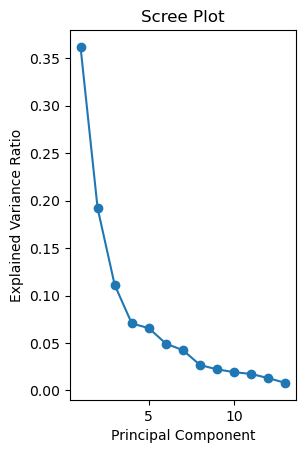

In [12]:
plt.subplot(1,2,1)
plt.plot(range(1, X.shape[1]+1), explained_variance_ratio, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

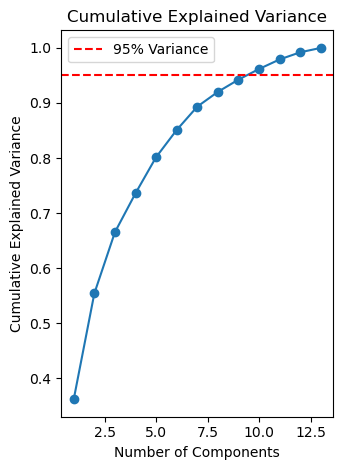

In [13]:
plt.subplot(1,2,2)
plt.plot(range(1, X.shape[1]+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()

plt.tight_layout()
plt.show()

Optimal number of components (95% variance): 10
Original shape: (178, 13)
Reduced shape: (178, 10)


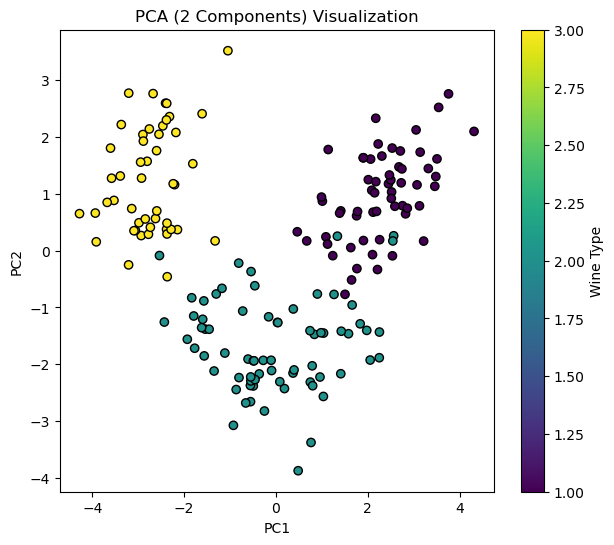

In [15]:
# First, we need to calculate the optimal_components value
# Add this code before using optimal_components

# Create a PCA object
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Optimal number of components (95% variance): {optimal_components}")

# 📌 Step 6: Transform dataset using optimal components
pca_opt = PCA(n_components=optimal_components)
X_reduced = pca_opt.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

# 📌 Step 7 (Optional): If you want 2D visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap="viridis", edgecolor="k")
plt.title("PCA (2 Components) Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Wine Type")
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 📌 Step 1: Load dataset
df = pd.read_csv("wine.csv")   # Change path if needed

# Separate features and target
X = df.drop("Type", axis=1)
y = df["Type"]

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 3: Apply K-means clustering (k=3 since we know there are 3 wine types)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


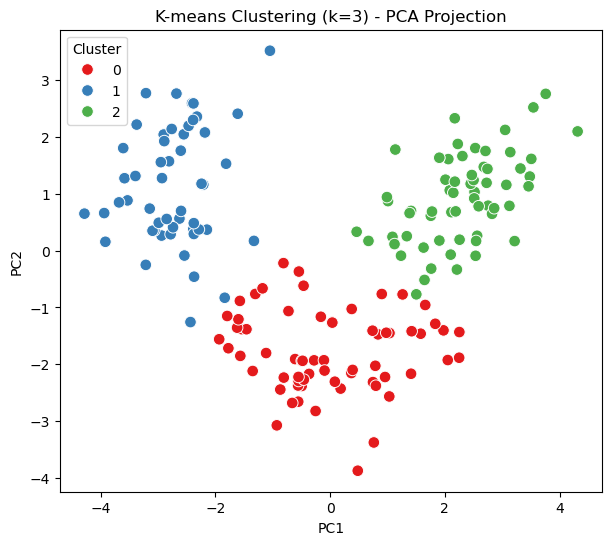

In [18]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_2d[:,0], y=X_2d[:,1],
    hue=clusters, palette="Set1", s=70
)
plt.title("K-means Clustering (k=3) - PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [19]:
sil_score = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")

# 📌 Step 6 (Optional): Compare clustering with actual labels
df_results = pd.DataFrame({
    "True_Label": y,
    "Cluster": clusters
})
print(df_results.head())

Silhouette Score: 0.285
Davies–Bouldin Index: 1.389
   True_Label  Cluster
0           1        2
1           1        2
2           1        2
3           1        2
4           1        2


In [20]:
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

sil_orig = silhouette_score(X_scaled, clusters_orig)
db_orig = davies_bouldin_score(X_scaled, clusters_orig)

print("🔹 Original Dataset Clustering")
print(f"Silhouette Score: {sil_orig:.3f}")
print(f"Davies–Bouldin Index: {db_orig:.3f}")


🔹 Original Dataset Clustering
Silhouette Score: 0.285
Davies–Bouldin Index: 1.389


C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 📌 Step 5: K-means on PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, clusters_pca)
db_pca = davies_bouldin_score(X_pca, clusters_pca)

print("\n🔹 PCA-Reduced Dataset Clustering (10 PCs)")
print(f"Silhouette Score: {sil_pca:.3f}")
print(f"Davies–Bouldin Index: {db_pca:.3f}")



🔹 PCA-Reduced Dataset Clustering (10 PCs)
Silhouette Score: 0.299
Davies–Bouldin Index: 1.336


C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

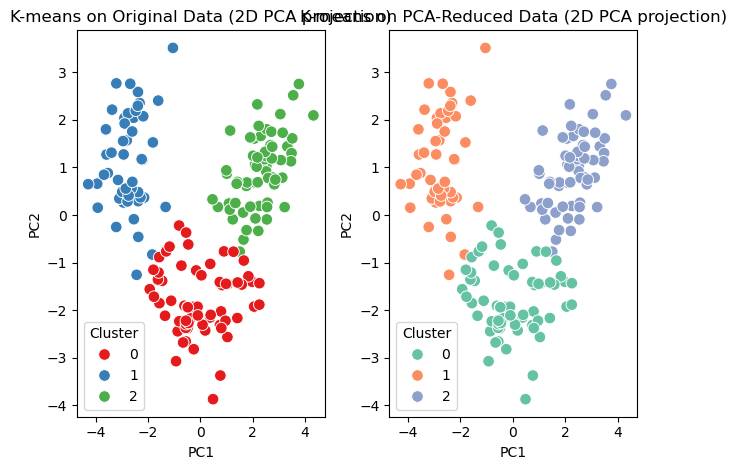

In [23]:
plt.subplot(1,2,1)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=clusters_orig, palette="Set1", s=70)
plt.title("K-means on Original Data (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")

# PCA clustering visualization
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=clusters_pca, palette="Set2", s=70)
plt.title("K-means on PCA-Reduced Data (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [24]:
comparison = pd.DataFrame({
    "True_Label": y,
    "Cluster_Original": clusters_orig,
    "Cluster_PCA": clusters_pca
})
print("\nCluster Comparison (first 10 rows):")
print(comparison.head(10))


Cluster Comparison (first 10 rows):
   True_Label  Cluster_Original  Cluster_PCA
0           1                 2            2
1           1                 2            2
2           1                 2            2
3           1                 2            2
4           1                 2            2
5           1                 2            2
6           1                 2            2
7           1                 2            2
8           1                 2            2
9           1                 2            2


In [25]:
pca = PCA(n_components=10)  # 10 PCs ~95% variance
X_pca = pca.fit_transform(X_scaled)

# 📌 Step 5: K-means on PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, clusters_pca)
db_pca = davies_bouldin_score(X_pca, clusters_pca)

# 📌 Step 6: Visualization (2D projection)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(12,5))



C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

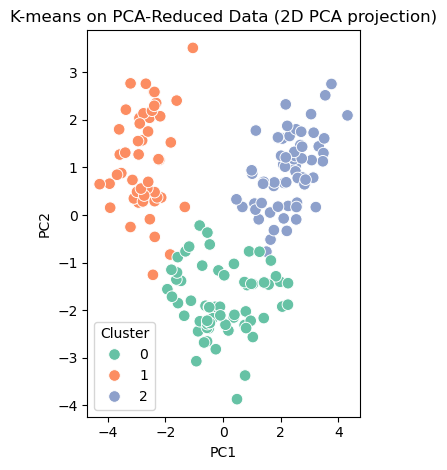

🔹 Clustering Performance Comparison
        Dataset  Silhouette Score  Davies-Bouldin Index
0      Original          0.284859              1.389188
1  PCA (10 PCs)          0.298675              1.336326

Cluster Comparison (first 10 rows):
   True_Label  Cluster_Original  Cluster_PCA
0           1                 2            2
1           1                 2            2
2           1                 2            2
3           1                 2            2
4           1                 2            2
5           1                 2            2
6           1                 2            2
7           1                 2            2
8           1                 2            2
9           1                 2            2


In [26]:
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=clusters_pca, palette="Set2", s=70)
plt.title("K-means on PCA-Reduced Data (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()

# 📌 Step 7: Comparison Summary
results = pd.DataFrame({
    "Dataset": ["Original", "PCA (10 PCs)"],
    "Silhouette Score": [sil_orig, sil_pca],
    "Davies-Bouldin Index": [db_orig, db_pca]
})

print("🔹 Clustering Performance Comparison")
print(results)

# 📌 Step 8: Optional detailed comparison table with labels
comparison = pd.DataFrame({
    "True_Label": y,
    "Cluster_Original": clusters_orig,
    "Cluster_PCA": clusters_pca
})
print("\nCluster Comparison (first 10 rows):")
print(comparison.head(10))